In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Master/mlgs/project1A'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
[Errno 2] No such file or directory: 'drive/My Drive/Master/mlgs/project1A'
/content


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
import time

In [3]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-pa

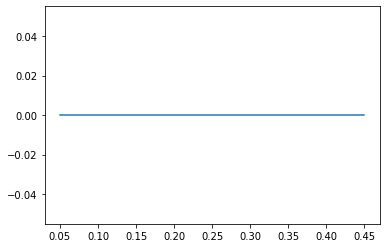

In [14]:
# Experiment Randomisation first compute the log-lottery distribution:
np.random.seed(5)
a = 1
b = 100
#u = (a+b)/2
#sigma = np.sqrt((b-a)**2/12)
u = 1
sigma = 1

def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [0,0.5])

pi1 = min(root)
pi2 = max(root)

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline((pi2/pi1-1)/don)
plt.plot(x,y)
plt.show()

In [ ]:
r = sigma/u
def solve_rho(x):
   return (1/(x**2))*(2*np.exp(x-1)-1)-1-r**2

upper = fsolve(solve_rho, 2)

lower = 1 + np.log(1+r**2)
print("when r = " + str(r) + ", our upper bound for APX = " + str(upper)+ " and  our lower bound = " + str(lower))

when r = 0.5659175905918115, our upper bound for APX = [2.60617367] and  our lower bound = 1.2778307465984462


In [16]:
pi1 * (1 + np.log(pi2/pi1)) - u
pi1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


0.0

(array([713., 695., 696., 663., 634., 551., 507., 496., 466., 485., 429.,
        429., 437., 342., 312., 262., 242., 266., 224., 210., 174., 166.,
        148., 109., 104.,  82.,  73.,  49.,  24.,  13.]),
 array([1.00000141, 1.01659532, 1.03318924, 1.04978315, 1.06637706,
        1.08297098, 1.09956489, 1.1161588 , 1.13275271, 1.14934663,
        1.16594054, 1.18253445, 1.19912836, 1.21572228, 1.23231619,
        1.2489101 , 1.26550402, 1.28209793, 1.29869184, 1.31528575,
        1.33187967, 1.34847358, 1.36506749, 1.3816614 , 1.39825532,
        1.41484923, 1.43144314, 1.44803705, 1.46463097, 1.48122488,
        1.49781879]),
 <a list of 30 Patch objects>)

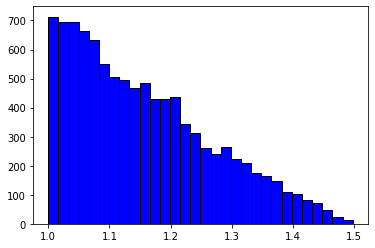

In [5]:
#using rejection sampling, get N random price samples
N = 10000
n = 0
#A =(pi2/pi1-1)*(pi2-pi1)/don
env =(pi2/pi1-1)/don
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/env
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1

plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
n = 1000000 
APX_list=[]
opt_list = []
exp_revenue_list = []
tic = time.clock()
for p_reserve in rej_sample:

  bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
  opt = auction_exp(bid_uniform,b/2)
  opt_list.append(opt)
  exp_revenue = auction_exp(bid_uniform,p_reserve)
  exp_revenue_list.append(exp_revenue)
  APX_list.append((opt/exp_revenue))  

toc = time.clock()
print("the total runtime: %s seconds" % (toc - tic))
print('Uniform distribution APX = ' + str(np.average(APX_list)))
#print("Theoritical APX_normal:")
#print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

the total runtime: 4024.287205 seconds
Uniform distribution APX = 1.2336996616931137


In [ ]:
# Experiment 1:
# random numbers from uniform distribution
# Generate 10000 numbers from 0 to 1 (run actuion 10000 times)
r = sigma/u
n = 100000 
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])

# np.isclose(F(x), [ 0.0])


data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = auction_exp(data_uniform,b/2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

worst case robust DAPX = [3.05346317]
Uniform distribution DAPX = [1.19013032]
Theoritically the DAPX_uniform:
[1.19217776]


In [ ]:
p_d

array([3.0011728])

In [ ]:
sum(opt_list)/sum(exp_revenue_list)
np.average(opt_list)/np.average(exp_revenue_list)

1.1951440351791742

In [ ]:
#Now if we assume bidder valuation is from a normal distribution
import time
APX_norm_list=[]
opt_norm_list = []
exp_norm_revenue_list = []
#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

#not super accurate, but due to the character of cdf and pde maybe also factorial
#use virtual valuation  = 0 to solve optimal reserve price
tic = time.clock()
def F(x):
  return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
p_opt = fsolve(F, u)
n = 1000000
bid = norm.rvs(loc = u,scale = sigma,size=n)
#remove the negative samples
bid_norm = [item for item in bid if item >= 0]
opt = auction_exp(bid_norm,p_opt)
for p_reserve in rej_sample:
  exp_revenue = auction_exp(bid_norm,p_reserve)
  exp_norm_revenue_list.append(exp_revenue)
toc = time.clock()
print('Normal distribution APX = ' + str(opt/np.average(exp_norm_revenue_list)))
print("the total runtime: %s seconds" % (toc - tic))

Normal distribution APX = [1.18967662]
the total runtime: 1130.1621379999997 seconds


In [ ]:
np.average(opt/exp_norm_revenue_list)
sigma

28.578838324886476

In [ ]:
#run determinstic DAPX
r = sigma/u
def f(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            
p_d = fsolve(f, [u])

reserve_p = p_d*u/(2*p_d-1)
opt = auction_exp(bid_norm,p_opt)
exp_revenue = auction_exp(bid_norm,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Normal distribution DAPX = ' + str(DAPX))
print("Theoritical DAPX_normal:")
print(p_opt*(1-(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(reserve_p*(1-(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))))
r

worst case robust DAPX = [3.0011728]
Normal distribution DAPX = [1.12595491]
Theoritical DAPX_normal:
[1.14239824]


0.5659175905918115

In [ ]:
APX_norm_list=[]
opt_norm_list = []
exp_norm_revenue_list = []
#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

#not super accurate, but due to the character of cdf and pde maybe also factorial
#use virtual valuation  = 0 to solve optimal reserve price
tic = time.clock()
def F(x):
  return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
p_opt = fsolve(F, u)
n = 1000000

for p_reserve in rej_sample:
  bid = norm.rvs(loc = u,scale = sigma,size=n)
  #remove the negative samples
  bid_norm = [item for item in bid if item >= 0]
  opt = auction_exp(bid_norm,p_opt)
  opt_norm_list.append(opt)
  exp_revenue = auction_exp(bid_norm,p_reserve)
  exp_norm_revenue_list.append(exp_revenue)
  APX_norm_list.append(opt/exp_revenue)
  toc = time.clock()

print('Normal distribution APX = ' + str(np.average(APX_norm_list)))
print("the total runtime: %s seconds" % (toc - tic))

Normal distribution APX = 1.1518479638482406
the total runtime: 220.4375460000001 seconds


In [ ]:
sum(opt_norm_list)/sum(exp_norm_revenue_list)

array([1.12673402])

In [ ]:
np.average(opt_norm_list)/np.average(exp_norm_revenue_list)

1.126623613328617

In [ ]:
u = 3
DAPX_list = []
r_list = []
p_d_list = []
p_opt_list = []
def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   
for i in np.arange(100):

  sigma = 0.5 + 0.5*i
  data = norm.rvs(loc = u,scale = sigma,size=n)
  #remove the negative samples
  data_norm = [item for item in data if item >= 0]
  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price
  
  p_opt = fsolve(F, u)
  p_opt_list.append(p_opt)
  r = sigma/u
  r_list.append(r)
     
  p_d = fsolve(f, [u])
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  opt = auction_exp(data_norm,p_opt)
  exp_revenue = auction_exp(data_norm,reserve_p)

  DAPX_list.append((opt/exp_revenue)[0])


In [ ]:
p_opt_list

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 1
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

array([1.49414051, 4.09347574])

In [ ]:
np.isclose(F(x), [1.49414051, 4.09347574])
x= [1.49414051, 4.09347574]
x[0] * (1 + np.log(x[1]/x[0])) - u
x[0] *(2*x[1]-x[0]) - u**2 - sigma**2

-3.950606952685121e-09

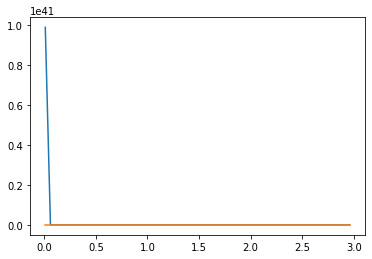

In [33]:
x = np.arange(0.01,3, 0.05)
u = 1
sigma = 4
x2_1 = np.exp(u/x-1)*x
x2_2 = ((u**2 + sigma**2)/x +x)*0.5
plt.plot(x,x2_1)
plt.plot(x,x2_2)
plt.show()

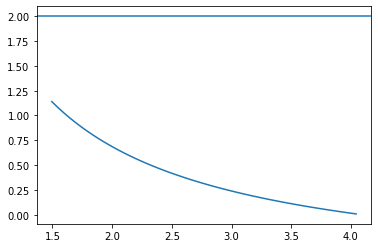

In [ ]:
pi2 = root[1]
pi1 = root[0]

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline(np.ceil((pi2/pi1-1)/don))
plt.plot(x,y)
plt.show()

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1

plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

(array([7103., 7252., 7191., 7236., 7067., 6743., 6113., 5650., 4983.,
        4666., 4268., 3910., 3548., 3320., 2906., 2690., 2331., 2108.,
        1928., 1648., 1518., 1270., 1124.,  941.,  768.,  648.,  463.,
         337.,  197.,   74.]),
 array([1.00003932, 1.0666106 , 1.13318188, 1.19975316, 1.26632444,
        1.33289573, 1.39946701, 1.46603829, 1.53260957, 1.59918085,
        1.66575213, 1.73232342, 1.7988947 , 1.86546598, 1.93203726,
        1.99860854, 2.06517982, 2.13175111, 2.19832239, 2.26489367,
        2.33146495, 2.39803623, 2.46460751, 2.5311788 , 2.59775008,
        2.66432136, 2.73089264, 2.79746392, 2.8640352 , 2.93060649,
        2.99717777]),
 <a list of 30 Patch objects>)

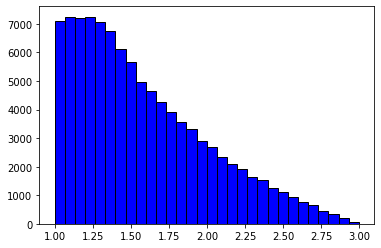

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))


worst case robust APX upper bound = 1.1053605156578263
Uniform distribution APX = 1.4096148418873307


In [ ]:
exp_revenue


2.121527270494244